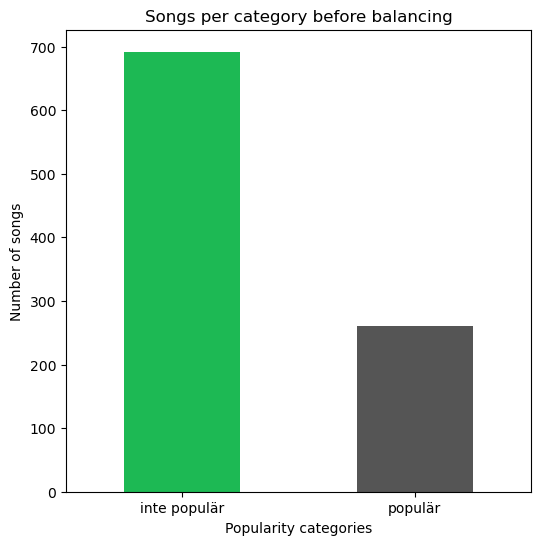

Baseline accuracy: 0.7382198952879581
              precision    recall  f1-score   support

inte populär       0.74      1.00      0.85       141
     populär       0.00      0.00      0.00        50

    accuracy                           0.74       191
   macro avg       0.37      0.50      0.42       191
weighted avg       0.54      0.74      0.63       191



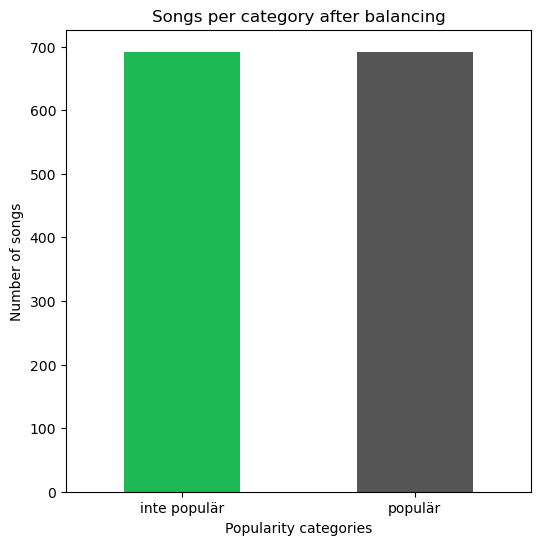

Counts after balancing: popularity_category
inte populär    692
populär         692
Name: count, dtype: int64
Optimized accuracy: 0.5234657039711191
              precision    recall  f1-score   support

inte populär       0.52      0.49      0.50       138
     populär       0.52      0.56      0.54       139

    accuracy                           0.52       277
   macro avg       0.52      0.52      0.52       277
weighted avg       0.52      0.52      0.52       277



In [1]:

# Spotify Popularity Classification (Exam Project)

#Detta projekt använder Spotify-datasetet för att förutsäga om en låt är populär eller inte populär. Vi använder Python, Jupyter Notebook och Maskininlärning (Logistisk Regression). Målet är att visa förståelse för arbetsflödet: Data → Modell → Optimering → Utvärdering.
# 1. Importera bibliotek

#Vi börjar med att importera alla nödvändiga bibliotek för datahantering, visualisering och maskininlärning.

import pandas as pd # For data handling (loading and manipulating the dataset)
import numpy as np
import matplotlib.pyplot as plt   # For plotting graphs and charts
from sklearn.model_selection import train_test_split   # For splitting data into train and test sets
from sklearn.linear_model import LogisticRegression   # Logistic Regression model
from sklearn.metrics import accuracy_score, classification_report   # To evaluate model performance
from imblearn.over_sampling import RandomOverSampler   # To balance dataset classes (oversampling)
     
# 2. Läs in datasetet

#Vi laddar in CSV-filen och tittar på de första raderna för att säkerställa att allt ser korrekt ut.

# Load the Spotify dataset
df = pd.read_csv('Popular_Spotify_Songs (1).csv', encoding='latin1')   # Read CSV with latin1 encoding (handles special chars)
df.head()   # Show first 5 rows to confirm the dataset loaded correctly
     
# 3. Skapa ny target-kolumn

#Vi klassificerar låtar som populär (≥ 5000 spellistor) eller inte populär (< 5000 spellistor).

# Define a function to classify songs as 'popular' or 'not popular'
def classify_popularity(playlist_count):   # playlist_count = number of Spotify playlists the song is in
    if playlist_count >= 5000:   # If >= 5000 playlists → considered popular
        return 'populär'
    else:
        return 'inte populär'

# Apply the function to create a new column 'popularity_category'
df['popularity_category'] = df['in_spotify_playlists'].apply(classify_popularity)
     
# 4. Förbered data (encoding av kategoriska variabler)

#Vi gör om mode och key till numeriska variabler så att modellen kan förstå dem.

# Encode categorical columns into numeric format
df['mode_encoded'] = df['mode'].map({'Major':1, 'Minor':0})   # Convert 'Major'=1, 'Minor'=0
df = pd.get_dummies(df, columns=['key'], prefix='key')   # One-hot encode 'key' column

# Select relevant numeric features for prediction
feature_columns = ['bpm', 'danceability_%', 'valence_%', 'energy_%',
                   'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

# Define X (features) and y (target)
X = df[feature_columns]   # Features = numeric columns selected above
y = df['popularity_category']   # Target = 'popular' or 'not popular'
     
# 5. Visualisera klassfördelning före balansering

#Här ser vi att datasetet är obalanserat (fler låtar i en kategori än den andra).

# Visualize class imbalance before balancing
original_counts = y.value_counts()   # Count how many songs are in each category
plt.figure(figsize=(6,6))
original_counts.plot(kind='bar', color=['#1DB954', '#555555'])   # Plot bar chart
plt.title('Songs per category before balancing')
plt.xlabel('Popularity categories')
plt.ylabel('Number of songs')
plt.xticks(rotation=0)
plt.show()
     
# 6. Baseline-modell (utan balansering)

#Vi tränar en första Logistic Regression på obalanserade data och utvärderar den.

# Split dataset into train and test for baseline model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   # 80% train, 20% test

# Train Logistic Regression baseline model
baseline_model = LogisticRegression(max_iter=1000, random_state=42)   # Initialize model
baseline_model.fit(X_train, y_train)   # Train model

# Predict on test set
y_pred_base = baseline_model.predict(X_test)

# Evaluate model
print('Baseline accuracy:', accuracy_score(y_test, y_pred_base))   # Print accuracy
print(classification_report(y_test, y_pred_base, zero_division=0))   # Detailed classification report
     
# 7. Balansera datasetet

#Vi använder RandomOverSampler för att skapa lika många exempel i båda klasserna.

# Balance dataset using oversampling
oversampler = RandomOverSampler(random_state=42)   # Initialize oversampler
X_resampled, y_resampled = oversampler.fit_resample(X, y)   # Apply oversampling to balance classes

# Show class counts after balancing
balanced_counts = y_resampled.value_counts()
plt.figure(figsize=(6,6))
balanced_counts.plot(kind='bar', color=['#1DB954', '#555555'])
plt.title('Songs per category after balancing')
plt.xlabel('Popularity categories')
plt.ylabel('Number of songs')
plt.xticks(rotation=0)
plt.show()

print('Counts after balancing:', y_resampled.value_counts())
     
# 8. Modell efter balansering

# Vi tränar samma modell igen men nu på det balanserade datasetet och jämför resultatet.

# Train model again with balanced dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000, random_state=42)   # Re-train Logistic Regression
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate improved model
print('Optimized accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
     
